In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [274]:
sklearn.__version__

'1.2.2'

In [275]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [276]:
train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [277]:
train.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [278]:
test.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [279]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [280]:
train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [281]:
train.shape

(43957, 15)

In [282]:
train['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [283]:
train['native-country'].unique()

array(['United-States', 'Japan', 'South', 'Portugal', 'Italy', 'Mexico',
       'Ecuador', 'England', 'Philippines', 'China', 'Germany', nan,
       'Dominican-Republic', 'Jamaica', 'Vietnam', 'Thailand',
       'Puerto-Rico', 'Cuba', 'India', 'Cambodia', 'Yugoslavia', 'Iran',
       'El-Salvador', 'Poland', 'Greece', 'Ireland', 'Canada',
       'Guatemala', 'Scotland', 'Columbia', 'Outlying-US(Guam-USVI-etc)',
       'Haiti', 'Peru', 'Nicaragua', 'Taiwan', 'France',
       'Trinadad&Tobago', 'Laos', 'Hungary', 'Honduras', 'Hong',
       'Holand-Netherlands'], dtype=object)

In [284]:
train['occupation'].unique()

array(['Exec-managerial', 'Other-service', 'Transport-moving',
       'Adm-clerical', 'Machine-op-inspct', 'Sales', 'Handlers-cleaners',
       'Farming-fishing', 'Protective-serv', 'Prof-specialty',
       'Craft-repair', nan, 'Tech-support', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [285]:
train['education'].unique()

array(['Doctorate', '12th', 'Bachelors', '7th-8th', 'Some-college',
       'HS-grad', '9th', '10th', '11th', 'Masters', 'Preschool',
       '5th-6th', 'Prof-school', 'Assoc-voc', '1st-4th', 'Assoc-acdm'],
      dtype=object)

In [286]:
train['relationship'].unique()

array(['Not-in-family', 'Own-child', 'Husband', 'Wife', 'Unmarried',
       'Other-relative'], dtype=object)

In [287]:
train['marital-status'].unique()

array(['Divorced', 'Never-married', 'Married-civ-spouse', 'Widowed',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [288]:
label_enc = LabelEncoder()
label_enc.fit(train['workclass'])
train['workclass'] = label_enc.transform(train['workclass'])
test['workclass'] = label_enc.transform(test['workclass'])

In [289]:
train['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [290]:
train['workclass'].unique()

array([3, 6, 5, 0, 1, 4, 8, 2, 7])

In [291]:
train['workclass'].unique()

array([3, 6, 5, 0, 1, 4, 8, 2, 7])

In [292]:
label_enc.fit(train['gender'])
train['gender'] = label_enc.transform(train['gender'])
test['gender'] = label_enc.transform(test['gender'])

In [293]:
label_enc.fit(train['occupation'])
train['occupation'] = label_enc.transform(train['occupation'])
test['occupation'] = label_enc.transform(test['occupation'])

In [294]:
train['occupation'].unique()


array([ 3,  7, 13,  0,  6, 11,  5,  4, 10,  9,  2, 14, 12,  8,  1])

In [295]:
label_enc.fit(train['native-country'])
train['native-country'] = label_enc.transform(train['native-country'])
test['native-country'] = label_enc.transform(test['native-country'])

In [296]:
train['native-country'].unique()

array([38, 23, 34, 31, 21, 25,  6,  8, 29,  2, 10, 41,  5, 22, 39, 36, 32,
        4, 18,  0, 40, 19,  7, 30, 11, 20,  1, 12, 33,  3, 27, 13, 28, 26,
       35,  9, 37, 24, 17, 15, 16, 14])

In [297]:
label_enc.fit(train['education'])
train['education'] = label_enc.transform(train['education'])
test['education'] = label_enc.transform(test['education'])

In [298]:
label_enc.fit(train['marital-status'])
train['marital-status'] = label_enc.transform(train['marital-status'])
test['marital-status'] = label_enc.transform(test['marital-status'])


In [299]:
train['relationship'].unique()

array(['Not-in-family', 'Own-child', 'Husband', 'Wife', 'Unmarried',
       'Other-relative'], dtype=object)

In [300]:
label_enc.fit(train['relationship'])
train['relationship'] = label_enc.transform(train['relationship'])
test['relationship'] = label_enc.transform(test['relationship'])

In [301]:
label_enc.fit(train['race'])
train['race'] = label_enc.transform(train['race'])
test['race'] = label_enc.transform(test['race'])

In [302]:
train['workclass'].unique()

array([3, 6, 5, 0, 1, 4, 8, 2, 7])

In [303]:
train.isna().sum()


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [304]:
train['workclass'].max()

8

In [305]:
train.isna().sum().sum()

0

In [306]:
train.describe()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
count,43957.000000,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,3.381737,1.896730e+05,10.284255,10.074118,2.617922,6.439907,1.442501,3.667584,0.668835,1093.559797,88.246491,40.407694,36.475669,0.239279
std,13.734401,1.584764,1.058215e+05,3.879103,2.575092,1.506998,4.324616,1.601354,0.846279,0.470637,7570.536063,404.588410,12.400303,6.067276,0.426648
min,17.000000,0.000000,1.349200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.174960e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.781000e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.376710e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,8.000000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


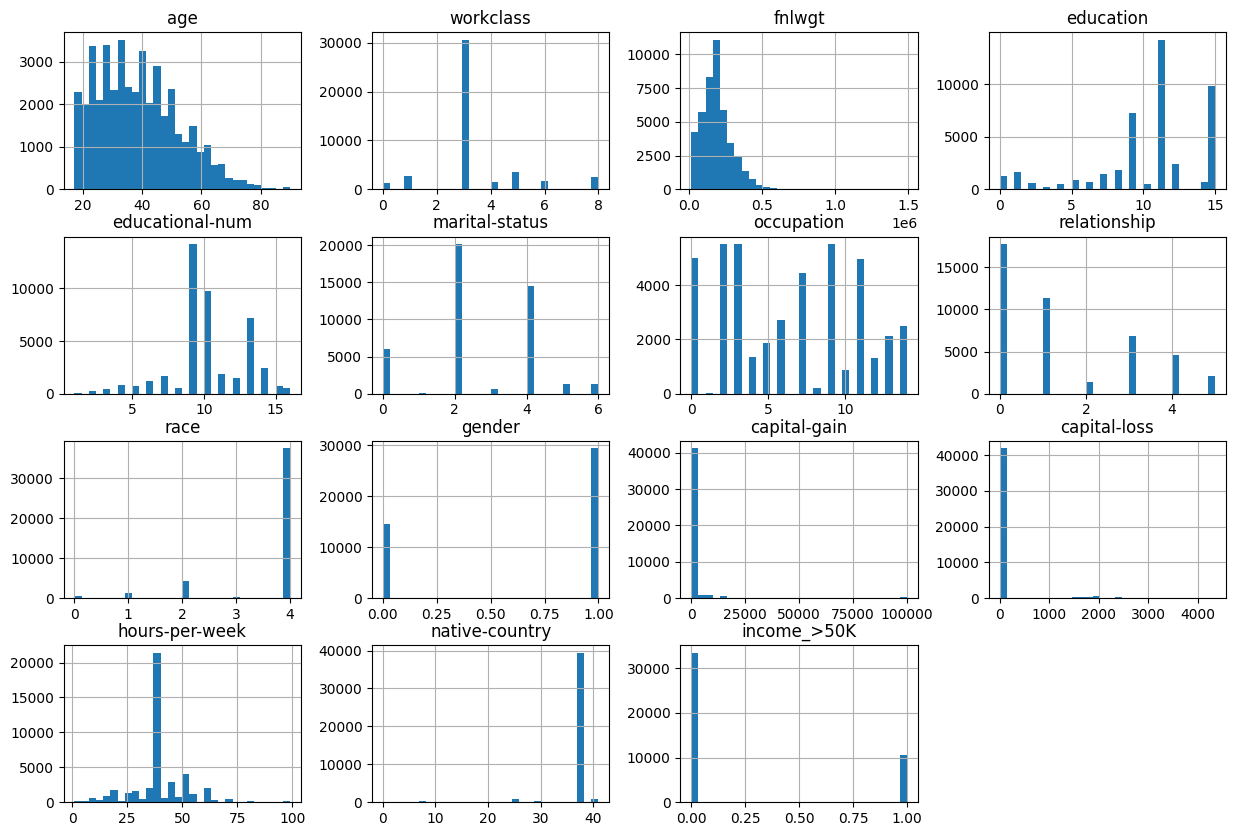

In [307]:
train.hist(bins=30, figsize=(15, 10));

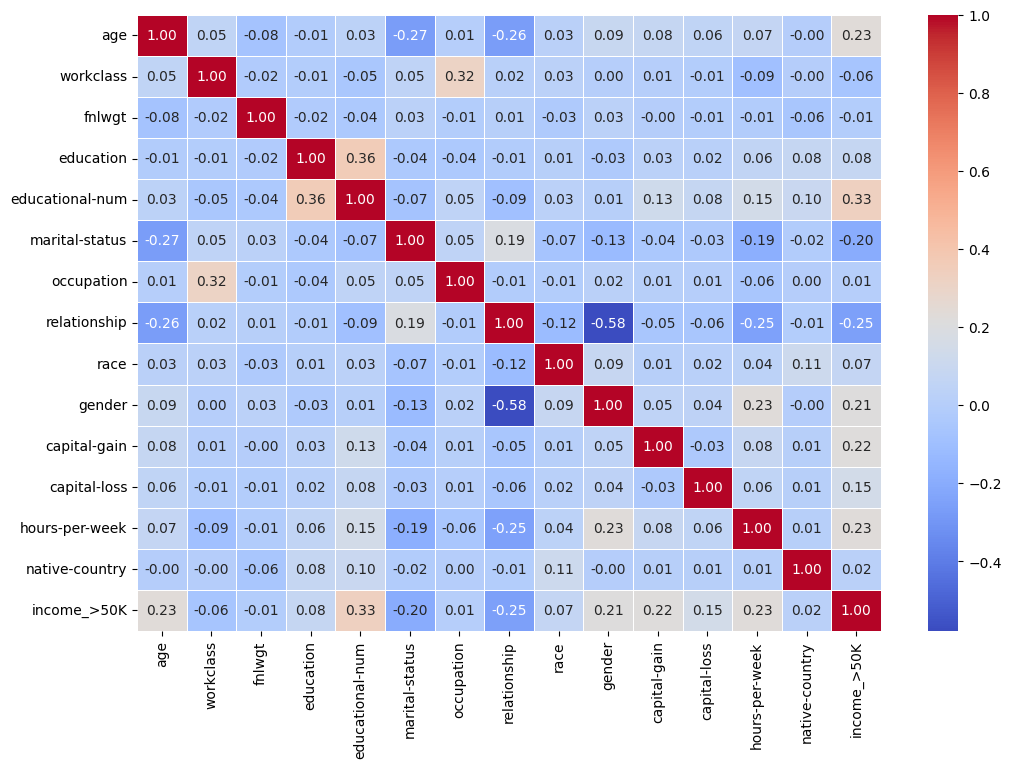

In [308]:
plt.figure(figsize=(12, 8))
corr = train.corr()
sns.heatmap(corr, annot = True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

In [309]:
X = train.drop(['income_>50K'], axis =1)
y = train['income_>50K']

In [310]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((30769, 14), (30769,), (13188, 14), (13188,))

In [311]:
log=LogisticRegression()
log.fit(x_train, y_train)
#log.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [312]:
sgd=SGDClassifier(loss="perceptron")
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.7914012738853503

In [313]:
sgd.score(x_train, y_train)

0.79537846533849

In [314]:
dee=DecisionTreeClassifier(criterion ="gini" ,max_depth = 5)
dee.fit(x_train, y_train)
dee.score(x_test, y_test)

0.8495602062481044

In [315]:
y_pred=dee.predict(x_test)

In [316]:
dee.score(x_train, y_train)

0.8533263999479996

[Text(0.5323275862068966, 0.9166666666666666, 'x[7] <= 0.5\ngini = 0.365\nsamples = 30769\nvalue = [23392, 7377]'),
 Text(0.27586206896551724, 0.75, 'x[4] <= 12.5\ngini = 0.495\nsamples = 12382\nvalue = [6785, 5597]'),
 Text(0.13793103448275862, 0.5833333333333334, 'x[10] <= 5095.5\ngini = 0.443\nsamples = 8636\nvalue = [5771, 2865]'),
 Text(0.06896551724137931, 0.4166666666666667, 'x[4] <= 8.5\ngini = 0.42\nsamples = 8233\nvalue = [5762, 2471]'),
 Text(0.034482758620689655, 0.25, 'x[12] <= 43.5\ngini = 0.192\nsamples = 1417\nvalue = [1265, 152]'),
 Text(0.017241379310344827, 0.08333333333333333, 'gini = 0.143\nsamples = 1061\nvalue = [979, 82]'),
 Text(0.05172413793103448, 0.08333333333333333, 'gini = 0.316\nsamples = 356\nvalue = [286, 70]'),
 Text(0.10344827586206896, 0.25, 'x[11] <= 1846.0\ngini = 0.449\nsamples = 6816\nvalue = [4497, 2319]'),
 Text(0.08620689655172414, 0.08333333333333333, 'gini = 0.437\nsamples = 6553\nvalue = [4438, 2115]'),
 Text(0.1206896551724138, 0.083333333

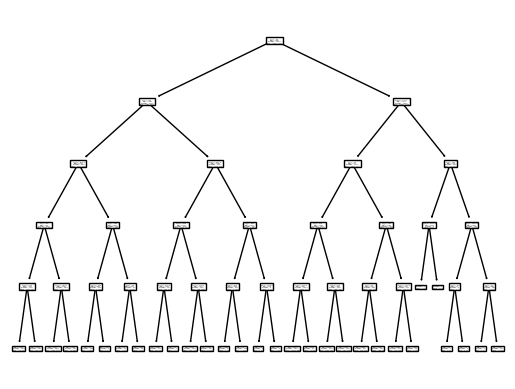

In [317]:
tree.plot_tree(dee)

In [318]:
pred=dee.predict(test)
pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [319]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.95      0.91     10047\n           1       0.77      0.53      0.63      3141\n\n    accuracy                           0.85     13188\n   macro avg       0.82      0.74      0.77     13188\nweighted avg       0.84      0.85      0.84     13188\n'

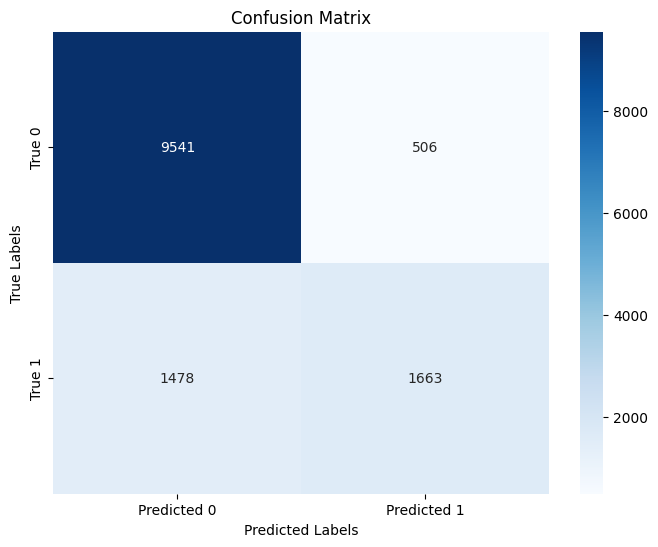

In [320]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["True 0", "True 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [321]:
#with open('classifier.pkl','wb') as file:
 # pickle.dump(dee,file)